In [2]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

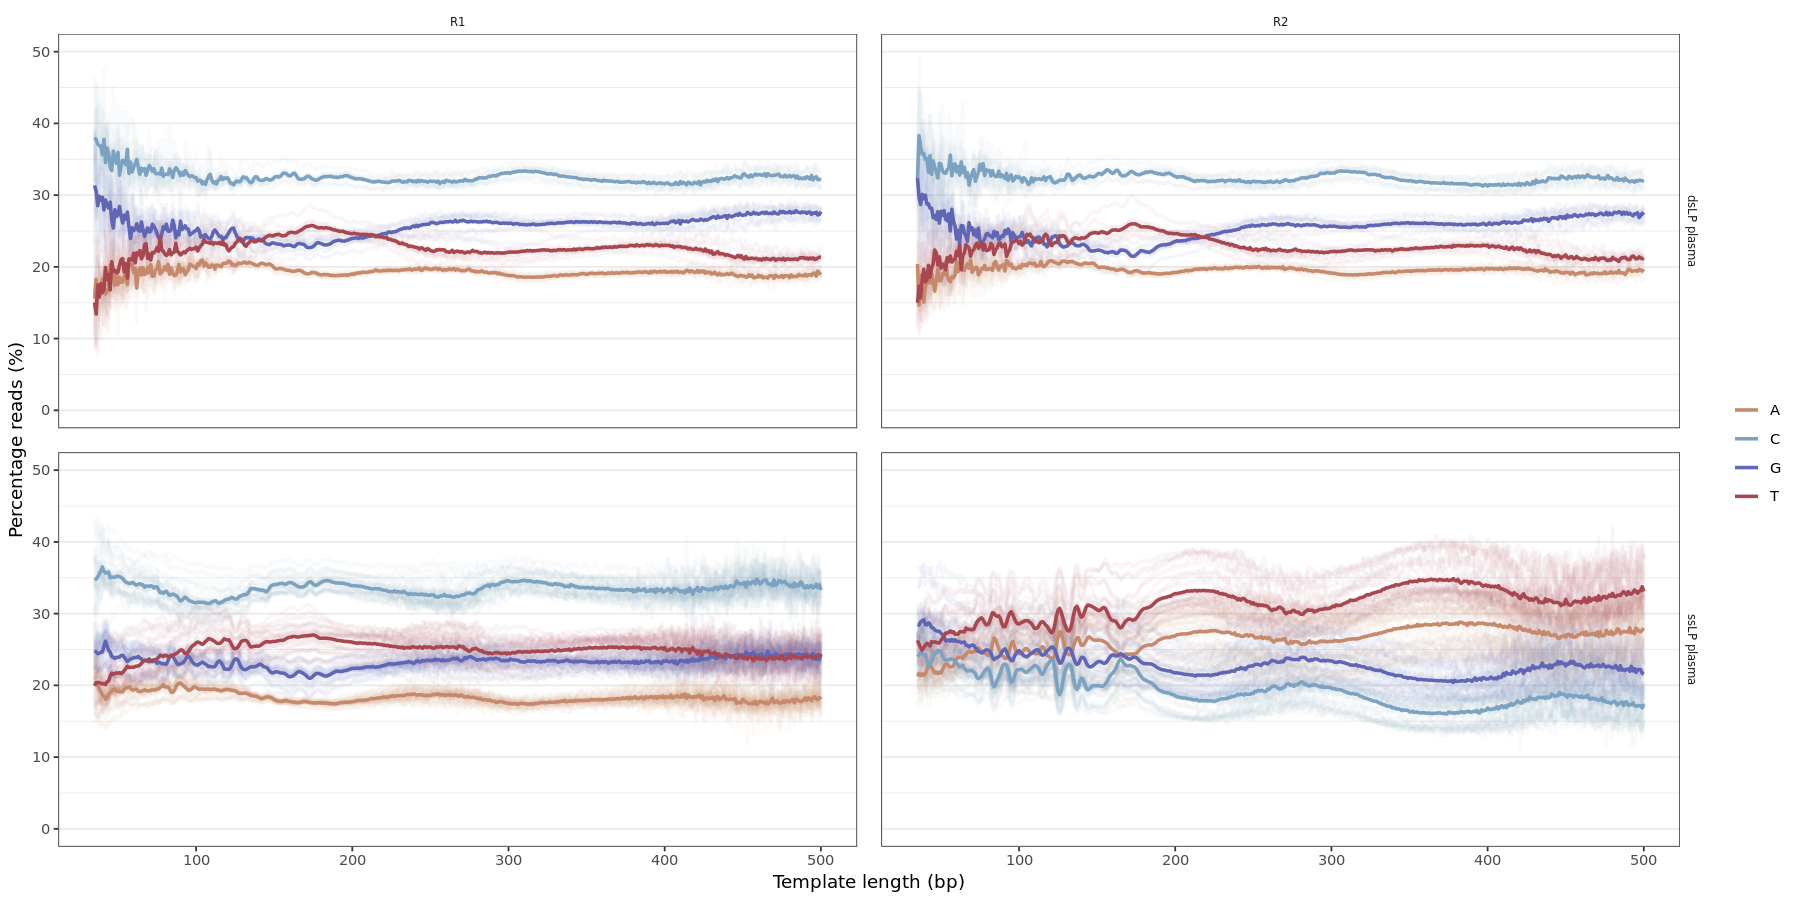

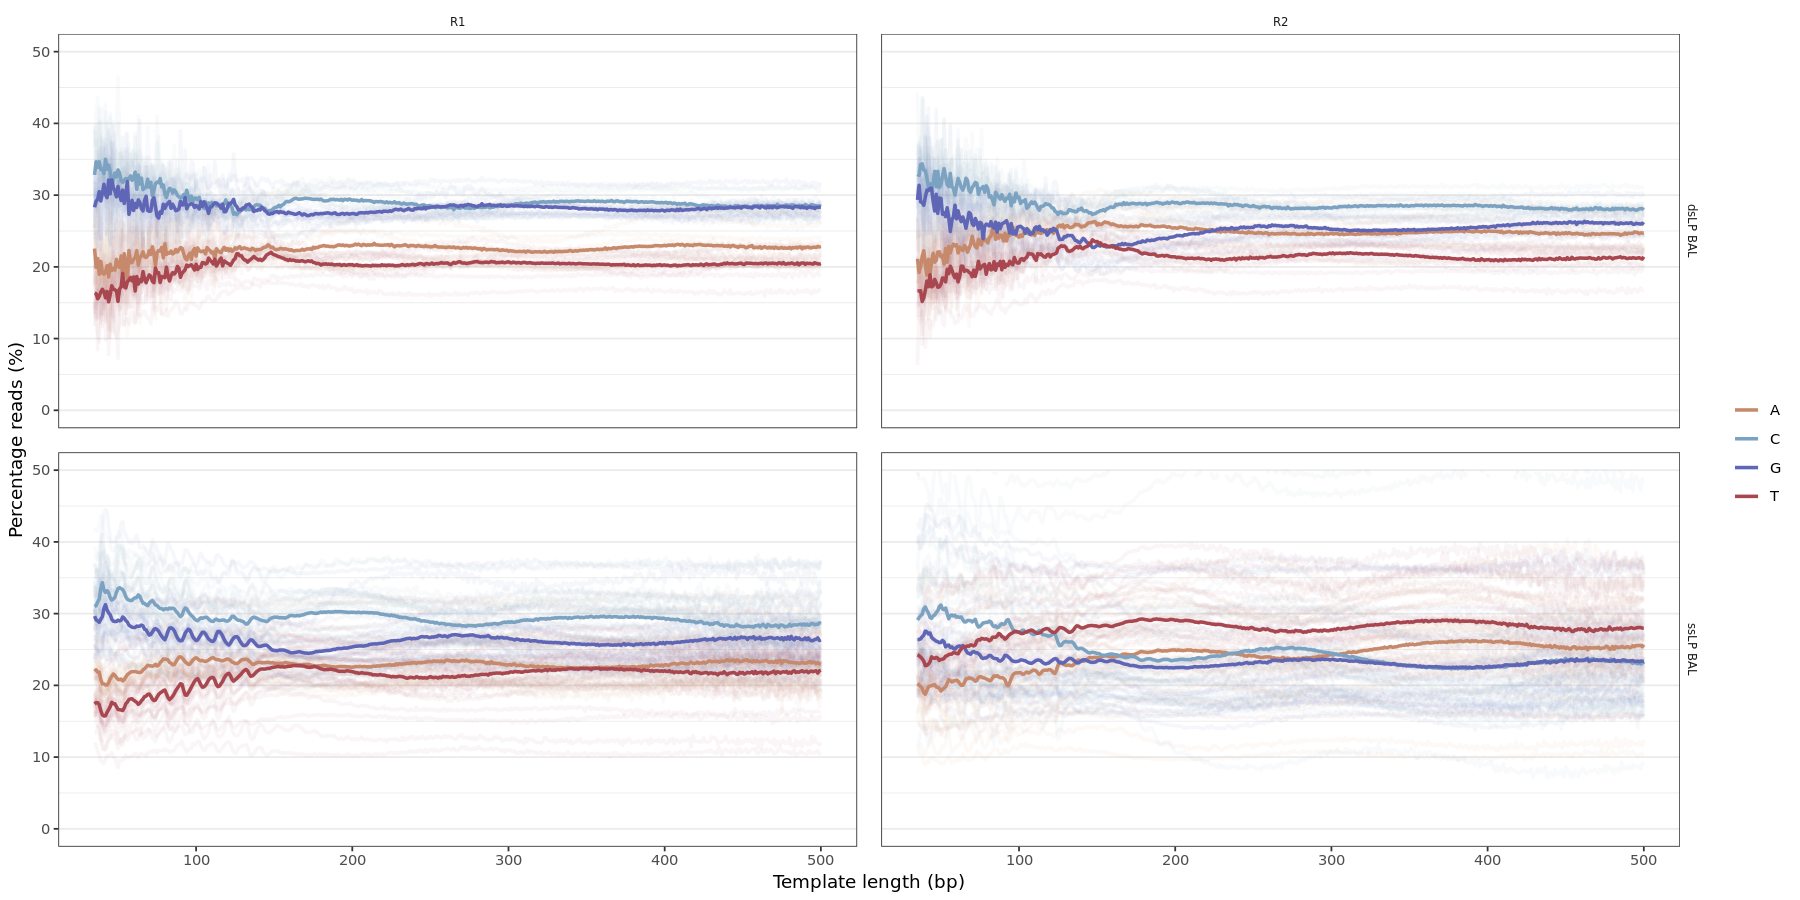

In [6]:
options(repr.plot.width=15, repr.plot.height=7.5)
for(sel_sample in c("plasma", "BAL")){

    host_nonMT_endX_TLEN_tmp <- host_nonMT_endX_TLEN %>% filter(sample == sel_sample)
    host_nonMT_endX_TLEN_summarized_tmp <- host_nonMT_endX_TLEN_summarized %>% filter(sample == sel_sample)
    
    plt_host_nonMT_endX_TLEN <- host_nonMT_endX_TLEN_tmp %>% 
        ggplot(aes(x = TLEN)) + 
            geom_line(data = host_nonMT_endX_TLEN_tmp, 
                      aes(y = nsCount, col = EndX, group = interaction(EndX, sample_id)), size = 1, alpha = 0.05) + 
            geom_line(data = host_nonMT_endX_TLEN_summarized_tmp, 
                      aes(y = mnsCount, col = EndX, group = EndX), size = 1) + 
            facet_grid(rows = vars(sample_type), cols = vars(read)) + 
            scale_color_manual(values = c("A" = "#C6896C", "T" = "#A84750", 
                                         "C" = "#7CA2C2", "G" = "#6066B6")) +
            ylim(0,50) +   
            theme_bw() +
            labs(x = "Template length (bp)", y = "Percentage reads (%)", alpha = "End-motif\n1mer", 
                col = "", linetype = "") + 
            theme(strip.background = element_rect(color = "white", fill = "white"), 
                panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(size = 7)) 
    
    plt_host_nonMT_endX_TLEN %>% print()

    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample,"_endX_TLEN.png"), plot = plt_host_nonMT_endX_TLEN, 
               width = 15, height = 7.5)
    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample, "_endX_TLEN.pdf"), plot = plt_host_nonMT_endX_TLEN, 
               width = 15, height = 7.5)
}